### Medical Appointment No Shows 
The dataset contains 110,527 medical appointments and its 14 associated variables. The most important one is no-show variable, the target variable for models, to indicate if the patient show-up or no-show to the appointment. <br/>
Dataset: https://www.kaggle.com/joniarroba/noshowappointments

### Goal: Build a model to discover who will not show up for medical appointment
1. Which model has a better performance on recall? logistic regression model vs. Random Forest model
2. what are the most important features for the appointment no show?

### Finding:
1. Random Forest model perform better than logistic regression to find out who will not show up
2. Four most important features (lead time for appointment, age, gender, and received SMS) could identify if the patient show-up or no-show the appointment

#### Reference 
logistic regression: https://www.youtube.com/watch?v=VCJdg7YBbAQ <br/>
SMOTE for oversampling: https://beckernick.github.io/oversampling-modeling/ <br/>
precesion, recall, ROC, AUC: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc <br/>
ROC and precision-recall with imbalanced datasets: https://classeval.wordpress.com/simulation-analysis/roc-and-precision-recall-with-imbalanced-datasets/ <br/>
Evaluation Metrics, ROC-Curves and imbalanced datasets: http://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/ <br/>
Random Forest-feature importance:
https://github.com/WillKoehrsen/Data-Analysis/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

In [2]:
path="noshowappointments/KaggleV2-May-2016.csv"
df=pd.read_csv(path, header=0)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

#### Missing value

In [16]:
# Missing Value
# determine which row have null values
# result: no missing values
df[df.isnull().any(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [34]:
# build a checking list for unique value
check_list=["Gender", "Neighbourhood", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap",\
            "SMS_received", "No-show"]

In [33]:
# unique value and numbers of unique value
def unique_val_num(df, ls):
    for col in ls:
        uni=df[col].unique()
        num=df[col].nunique()
        print(col, "unique value:", uni, "numbers of unique:", num)

In [35]:
unique_val_num(df, check_list)

Gender unique value: ['F' 'M'] numbers of unique: 2
Neighbourhood unique value: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS

In [38]:
# Duplicate data
# list out if there is duplicated row
df[df.duplicated(keep='first')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Convert string to datetime

In [6]:
## dataframe originally looks like this formate
df[["AppointmentDay","ScheduledDay"]].head()

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z


In [9]:
# Convert time string to datetime
import datetime
df["ScheduledDay"]=df["ScheduledDay"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

In [10]:
## data type is converted to datatime
df[["ScheduledDay"]].dtypes

ScheduledDay    datetime64[ns]
dtype: object

In [11]:
df["AppointmentDay"]=df["AppointmentDay"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

In [12]:
df[["AppointmentDay"]].dtypes

AppointmentDay    datetime64[ns]
dtype: object

In [13]:
## check dataframe if desired
df[["AppointmentDay","ScheduledDay"]].head()

,AppointmentDay,ScheduledDay
0,2016-04-29,2016-04-29 18:38:08
1,2016-04-29,2016-04-29 16:08:27
2,2016-04-29,2016-04-29 16:19:04
3,2016-04-29,2016-04-29 17:29:31
4,2016-04-29,2016-04-29 16:07:23


In [14]:
from time import strftime

# change the data formate
new_format = "%Y-%m-%d"
df["ScheduledDay"]=df["ScheduledDay"].apply(lambda x : x.strftime(new_format))

In [15]:
## check dataframe if desired
df[["AppointmentDay","ScheduledDay"]].head()

,AppointmentDay,ScheduledDay
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


In [17]:
df[["AppointmentDay","ScheduledDay"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AppointmentDay  110527 non-null  datetime64[ns]
 1   ScheduledDay    110527 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ MB


In [18]:
import datetime

df["ScheduledDay"]=df["ScheduledDay"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
#df["AppointmentDay"]=df["AppointmentDay"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

In [19]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### create new feature

In [21]:
df["time_prior"]=df["AppointmentDay"]-df["ScheduledDay"]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   PatientId       110527 non-null  float64        
 1   AppointmentID   110527 non-null  int64          
 2   Gender          110527 non-null  object         
 3   ScheduledDay    110527 non-null  datetime64[ns] 
 4   AppointmentDay  110527 non-null  datetime64[ns] 
 5   Age             110527 non-null  int64          
 6   Neighbourhood   110527 non-null  object         
 7   Scholarship     110527 non-null  int64          
 8   Hipertension    110527 non-null  int64          
 9   Diabetes        110527 non-null  int64          
 10  Alcoholism      110527 non-null  int64          
 11  Handcap         110527 non-null  int64          
 12  SMS_received    110527 non-null  int64          
 13  No-show         110527 non-null  object         
 14  time_prior      1105

In [23]:
df[["time_prior"]].head()

,time_prior
0,0 days
1,0 days
2,0 days
3,0 days
4,0 days


In [42]:
## convert the above "0 days" to "0"
df["time_prior"]=df["time_prior"].apply(lambda x: x.days)

In [43]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_prior
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [30]:
print("numbers of patients in the dataset: "+str(len(df.index)))

numbers of patients in the dataset: 110527


### EDA

In [25]:
import seaborn as sns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  time_prior      110527 non-null  int

### distribution of No-show 

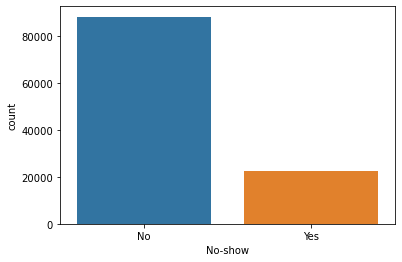

In [26]:
## it seems that target variable is imbalanced 
sns.countplot(x="No-show", data=df)

Note: No-show label "Yes" means the patient did not show up

### No-show count across different numbers of SMS received

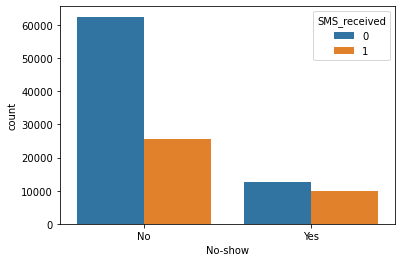

In [33]:
sns.countplot(x="No-show", data=df, hue="SMS_received")

### distribution of Gender

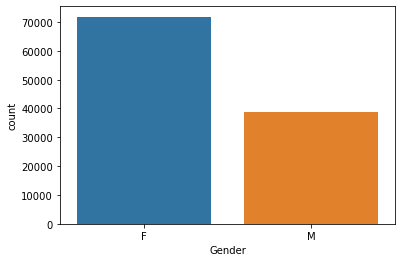

In [68]:
sns.countplot(x="Gender", data=df)

### No-show across Gender

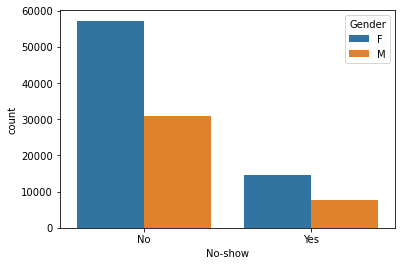

In [69]:
sns.countplot(x="No-show", data=df, hue="Gender")

### distribution of Neighbourhood 

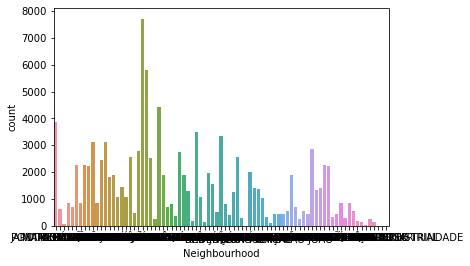

In [70]:
## plot is not clear 
sns.countplot(x="Neighbourhood", data=df)

### No-show across neighborhood

In [72]:
#It's a mess...
#sns.countplot(x="No-show", data=df, hue="Neighbourhood")

### distribution of Age

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Counts')

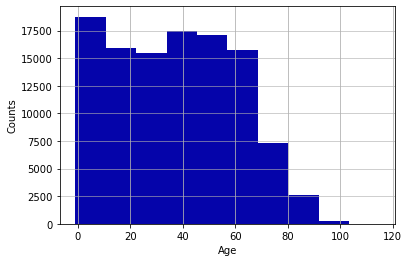

In [56]:
df["Age"].plot.hist(grid=True, color='#0504aa')

## add label
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Text(0.5, 1.0, 'Age')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a59e80a948>,
 'caps': [<matplotlib.lines.Line2D at 0x1a59e80af88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a59b3b3888>],
 'medians': [<matplotlib.lines.Line2D at 0x1a59e810c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a59e810dc8>],
 'means': []}

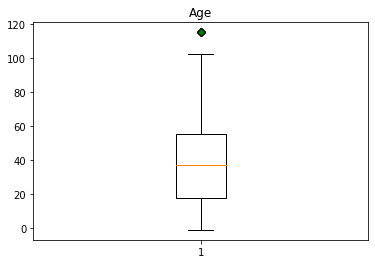

In [35]:
import matplotlib.pyplot as plt

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Age')
ax1.boxplot(df["Age"], flierprops=green_diamond)

50% of the patients' age are between 20 and 50 years old

### distribution of lead time for appointment

Text(0.5, 1.0, 'histogram for appointment lead time')

Text(0.5, 0, 'appointment lead time')

Text(0, 0.5, 'Counts')

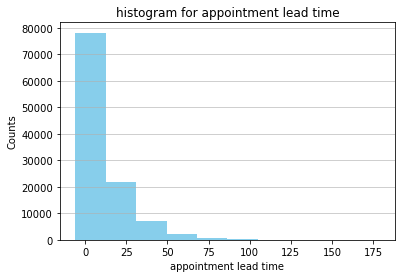

In [91]:
df["time_prior"].plot.hist(color = "skyblue")

## add label
plt.title("histogram for appointment lead time")
plt.xlabel('appointment lead time')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Text(0.5, 1.0, 'histogram for appointment lead time')

(0.0, 92.0)

([<matplotlib.axis.XTick at 0x1a5a2e01c08>,
 <a list of 13 Text major ticklabel objects>)

Text(0.5, 0, 'appointment lead time (days)')

Text(0, 0.5, 'Counts')

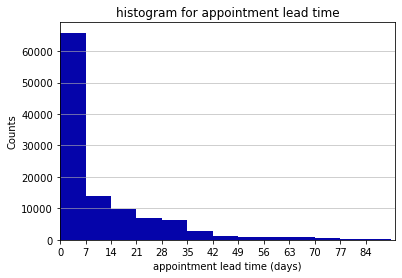

In [90]:
import numpy as np

df["time_prior"].plot.hist(color='#0504aa', bins=[0,7,14,21,28,35,42,49,56,63,70,77,84,91])

## add label
plt.title("histogram for appointment lead time")
plt.xlim([0, 92])
plt.xticks(np.arange(0, 91, step=7))  # Set label locations.
plt.xlabel('appointment lead time (days)')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [55]:
## save file
df.to_csv('out.csv', index=False)

### distribution of Hipertension

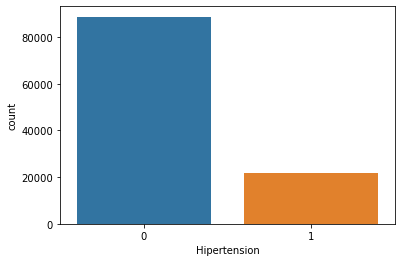

In [57]:
sns.countplot(x="Hipertension", data=df)

### No-show across Hipertension category

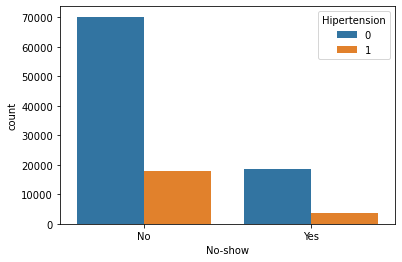

In [61]:
sns.countplot(x="No-show", data=df, hue="Hipertension")

### distribution of Diabetes

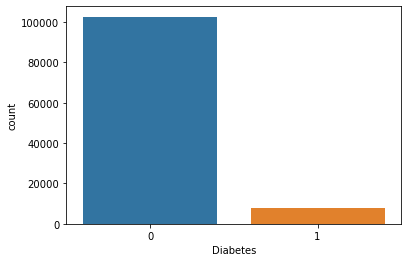

In [58]:
sns.countplot(x="Diabetes", data=df)

### No-show across Diabetes category

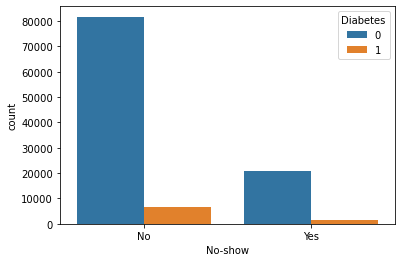

In [62]:
sns.countplot(x="No-show", data=df, hue="Diabetes")

### distribution of Alcoholism

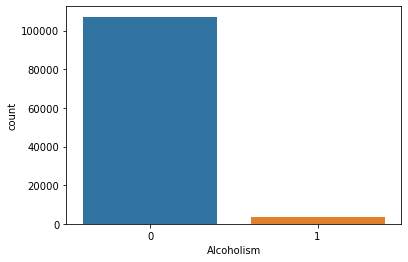

In [59]:
sns.countplot(x="Alcoholism", data=df)

### No-show across Alcoholism

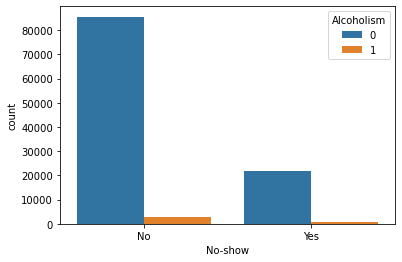

In [63]:
sns.countplot(x="No-show", data=df, hue="Alcoholism")

### distribution of Handcap

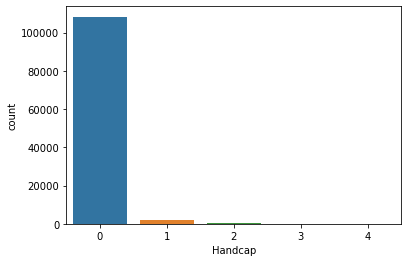

In [60]:
sns.countplot(x="Handcap", data=df)

### No-show across Handcap category

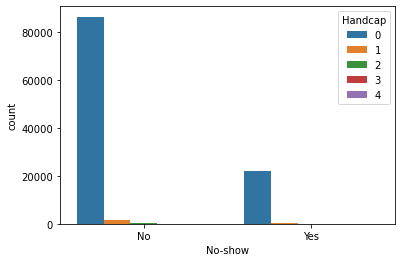

In [65]:
sns.countplot(x="No-show", data=df, hue="Handcap")

### Data Wrangling

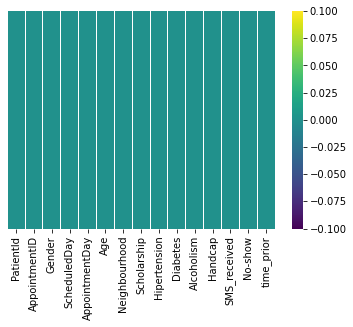

In [98]:
# no-null value 
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis") # like a dataframe, row is each patient, column is variable

### Create dummy variable (one-hot encode the categorical features?)

In [2]:
df=pd.read_csv("out.csv", header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
 14  time_prior      110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  time_prior      110527 non-null  int

In [4]:
gender=pd.get_dummies(df["Gender"], drop_first=True, prefix="gender")
gender.head(5)

,gender_M
0,0
1,1
2,0
3,0
4,0


In [5]:
Neighbourhood=pd.get_dummies(df["Neighbourhood"], drop_first=True)
Neighbourhood.head(3)

,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Hipertension=pd.get_dummies(df["Hipertension"], drop_first=True, prefix="Hipertension")
Hipertension.head(5)

,Hipertension_1
0,1
1,0
2,0
3,0
4,1


In [7]:
Diabetes=pd.get_dummies(df["Diabetes"], drop_first=True, prefix="Diabetes")
Diabetes.head(5)

,Diabetes_1
0,0
1,0
2,0
3,0
4,1


In [8]:
Alcoholism=pd.get_dummies(df["Alcoholism"], drop_first=True, prefix="Alcoholism")
Alcoholism.head(5)

,Alcoholism_1
0,0
1,0
2,0
3,0
4,0


In [9]:
Handcap=pd.get_dummies(df["Handcap"], drop_first=True, prefix="Handcap")
Handcap.head(5)

,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [10]:
SMS_received=pd.get_dummies(df["SMS_received"], drop_first=True, prefix="SMS_received")
SMS_received.head(5)

,SMS_received_1
0,0
1,0
2,0
3,0
4,0


In [11]:
df=pd.concat([df,gender,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Columns: 104 entries, PatientId to SMS_received_1
dtypes: float64(1), int64(9), object(5), uint8(89)
memory usage: 22.0+ MB


In [ ]:
#   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  time_prior      110527 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)

In [13]:
df.drop(["PatientId","AppointmentID","Gender","ScheduledDay","AppointmentDay","Neighbourhood","Scholarship",\
        "Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"], axis=1, inplace=True)

In [14]:
df.head(5)

,Age,No-show,time_prior,gender_M,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,...,UNIVERSITÁRIO,VILA RUBIM,Hipertension_1,Diabetes_1,Alcoholism_1,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_1
0,62,No,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56,No,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,No,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,No,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,No,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


### Logistic regression

### Train Data without SMOTE

In [15]:
X=df.drop("No-show", axis=1)
y=df["No-show"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [32]:
y_test[0:5]

92360     No
73222     No
2244      No
40855    Yes
20021    Yes
Name: No-show, dtype: object

In [18]:
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictions=logmodel.predict(X_test)

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.80      0.99      0.89     22126
         Yes       0.30      0.01      0.02      5506

    accuracy                           0.80     27632
   macro avg       0.55      0.50      0.45     27632
weighted avg       0.70      0.80      0.71     27632



In [21]:
confusion_matrix(y_test, predictions)

array([[21981,   145],
       [ 5444,    62]], dtype=int64)

From above, we find that the recall for label 'Yes' is only 0.01 

In [22]:
# check the class order
logmodel.classes_

array(['No', 'Yes'], dtype=object)

As a rule, any attribute in a learner that ends with _ is a learned one. In your case you're looking for logmodel.classes_.

In [23]:
## readable output I of predict probability for each class

## predict_proba returns the probability of the sample for each class in the model, 
## where classes are ordered as they are in self.classes_.
pd.DataFrame(logmodel.predict_proba(X_test), columns=logmodel.classes_).head()

,No,Yes
0,0.873476,0.126524
1,0.738139,0.261861
2,0.815215,0.184785
3,0.722562,0.277438
4,0.789197,0.210803


In [27]:
## readable output II of predict probability for each class
print(tuple(zip(logmodel.classes_, logmodel.predict_proba(X_test)[0])))

(('No', 0.8734759806799012), ('Yes', 0.1265240193200988))


#### ROC Curve vs. Precision-Recall Curve with imbalenced data

In [28]:
probs=logmodel.predict_proba(X_test)
probs = probs[:, 1]

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

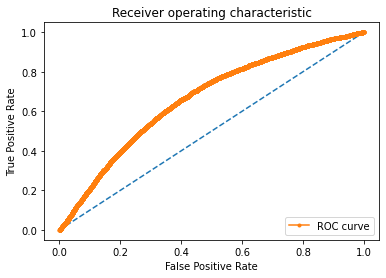

AUC: 0.664


In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label="Yes") # label 'Yes' to the positive class
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [40]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, probs, pos_label="Yes") # label 'Yes' to the positive class
auc_score = auc(recall, precision)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall plot')

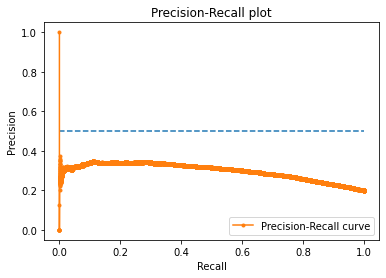

AUC: 0.298


In [44]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall plot')
plt.legend(loc="lower right")
plt.show()

print('AUC: %.3f' % auc_score)

Precision and Recall: A Tug of War <br/> 
To fully evaluate the effectiveness of a model, you must examine both precision and recall.<br/> 
Unfortunately, precision and recall are often in tension. That is, improving precision typically <br/> 
reduces recall and vice versa.

ROC Curve and AUC <br/>
An ROC curve plots TPR vs. FPR at different classification thresholds. <br/>
Lowering the classification threshold classifies more items as positive, <br/>
thus increasing both False Positives and True Positives. <br/>
That is, TPR and FPR both increase or decrease in the same direcation <br/>
when thresholds change. However, you would like a model to have a ROC curve <br/>
with a higher TPR and low FPR, which is a curve above random guess 45 degree straight line.<br/>
<br/>
Reference: deep learning course 3_classification_1 slides

### Train Data with SMOTE

In [139]:
print(X_train.shape)

(82895, 91)


In [45]:
x_train_smote, x_val_smote, y_train_smote, y_val_smote = train_test_split(X_train, y_train, test_size = .1,\
                                                  random_state=12)

In [146]:
print("Before oversample, the shape of training data: "+str(x_train_smote.shape))
print("Before oversample, the number of training label 'Yes': "+str(sum(y_train_smote=="Yes")))

Before oversample, the shape of training data: (74605, 91)
Before oversample, the number of training label 'Yes': 15061


In [46]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [47]:
## oversampling
sm = SMOTE(random_state=12)
x_train_s, y_train_s = sm.fit_sample(x_train_smote, y_train_smote)

In [48]:
print("After oversample, the shape of training data: "+str(x_train_s.shape))
print("After oversample, the numbers of target label 'Yes': "+str(sum(y_train_s=="Yes")))

After oversample, the shape of training data: (119088, 91)
After oversample, the numbers of target label 'Yes': 59544


In [49]:
logmodel_smote= LogisticRegression()
logmodel_smote.fit(x_train_s,y_train_s)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
## see validaion data
predictions_val=logmodel_smote.predict(x_val_smote)
print(classification_report(y_val_smote, predictions_val))

              precision    recall  f1-score   support

          No       0.80      0.82      0.81      6538
         Yes       0.26      0.24      0.25      1752

    accuracy                           0.70      8290
   macro avg       0.53      0.53      0.53      8290
weighted avg       0.69      0.70      0.69      8290



In [51]:
## see testing data
predictions_test=logmodel_smote.predict(X_test)
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

          No       0.81      0.82      0.82     22126
         Yes       0.25      0.25      0.25      5506

    accuracy                           0.71     27632
   macro avg       0.53      0.53      0.53     27632
weighted avg       0.70      0.71      0.70     27632



The recall for label "Yes" has increase to 0.25

### Precision-Recall Curve

In [52]:
probs=logmodel_smote.predict_proba(X_test)
probs = probs[:, 1]

In [53]:
precision, recall, thresholds = precision_recall_curve(y_test, probs, pos_label="Yes") # label 'Yes' to the positive class
auc_score = auc(recall, precision)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall plot')

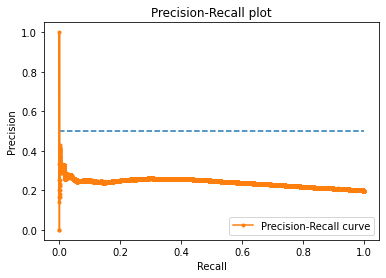

AUC: 0.240


In [54]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall plot')
plt.legend(loc="lower right")
plt.show()

print('AUC: %.3f' % auc_score)

### Random forest

In [149]:
df2=pd.read_csv("out.csv", header=0)
df2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_prior
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
 14  time_prior      110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


In [151]:
df2.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay","Scholarship"], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Hipertension   110527 non-null  int64 
 4   Diabetes       110527 non-null  int64 
 5   Alcoholism     110527 non-null  int64 
 6   Handcap        110527 non-null  int64 
 7   SMS_received   110527 non-null  int64 
 8   No-show        110527 non-null  object
 9   time_prior     110527 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


### Create dummy variables for category variables

In [152]:
dummy_ls=["Gender","Neighbourhood","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]

for c in dummy_ls:
    col=pd.get_dummies(df2[c], prefix=c)
    df2=pd.concat([df2,col], axis=1)

In [155]:
df2.head(2)

,Gender,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_prior,...,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1
0,F,62,JARDIM DA PENHA,1,0,0,0,0,No,0,...,0,1,0,1,0,0,0,0,1,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,0,...,0,1,0,1,0,0,0,0,1,0


In [157]:
df2.drop(df2[dummy_ls], axis=1, inplace=True)
df2.head(2)

,Age,No-show,time_prior,Gender_F,Gender_M,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,...,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1
0,62,No,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,56,No,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### Get features and label

In [160]:
X=df2.drop(["No-show"], axis=1)
y=df2["No-show"]

# Saving feature names for later use
features=list(X.columns)
print("the number of features: "+str(len(features)))

the number of features: 98


### Build Random forest model with oversampling

In [161]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=101)

# Split the training into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_features, train_labels, test_size = .1,random_state=12)

print("Before oversampling, the shape of training set:", x_train.shape)
print("Before oversampling, the number of label 'Yes' in training set:", sum(y_train=='Yes'))

Before oversampling, the shape of training set: (74605, 98)
Before oversampling, the number of label 'Yes' in training set: 15061


In [162]:
## oversampling on training 
sm = SMOTE(random_state=12)
x_train_s, y_train_s = sm.fit_sample(x_train, y_train)

print("After oversampling, the shape of training set:", x_train_s.shape)
print("After oversampling, the number of label 'Yes' in training set:", sum(y_train_s=='Yes'))

After oversampling, the shape of training set: (119088, 98)
After oversampling, the number of label 'Yes' in training set: 59544


In [163]:
from sklearn.ensemble import RandomForestClassifier

## build model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=12, max_features = 'sqrt')
clf_rf.fit(x_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [164]:
## see validaion data
predictions_val2=clf_rf.predict(x_val)
print(classification_report(y_val, predictions_val2))

              precision    recall  f1-score   support

          No       0.82      0.86      0.84      6538
         Yes       0.37      0.29      0.33      1752

    accuracy                           0.74      8290
   macro avg       0.59      0.58      0.58      8290
weighted avg       0.72      0.74      0.73      8290



In [165]:
## see testing data
predictions_test2=clf_rf.predict(test_features)
print(classification_report(test_labels, predictions_test2))

              precision    recall  f1-score   support

          No       0.83      0.86      0.85     22126
         Yes       0.34      0.29      0.31      5506

    accuracy                           0.75     27632
   macro avg       0.58      0.57      0.58     27632
weighted avg       0.73      0.75      0.74     27632



The recall for label "Yes" is 0.29 

### Feature importance

In [169]:
# Get numerical feature importances
importances = list(clf_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: time_prior                               Importance: 0.276
Variable: Age                                      Importance: 0.24
Variable: SMS_received_0                           Importance: 0.025
Variable: Gender_F                                 Importance: 0.018
Variable: SMS_received_1                           Importance: 0.016
Variable: Gender_M                                 Importance: 0.012
Variable: Hipertension_0                           Importance: 0.011
Variable: Neighbourhood_JARDIM CAMBURI             Importance: 0.009
Variable: Hipertension_1                           Importance: 0.009
Variable: Neighbourhood_CENTRO                     Importance: 0.008
Variable: Neighbourhood_ITARARÉ                    Importance: 0.008
Variable: Neighbourhood_JARDIM DA PENHA            Importance: 0.008
Variable: Neighbourhood_MARIA ORTIZ                Importance: 0.008
Variable: Neighbourhood_RESISTÊNCIA                Importance: 0.008
Variable: Neighbourhood_SANTA MARTH

In [171]:
top6=feature_importances[0:6]
print(tuple(top6))

(('time_prior', 0.276), ('Age', 0.24), ('SMS_received_0', 0.025), ('Gender_F', 0.018), ('SMS_received_1', 0.016), ('Gender_M', 0.012))


### Visualize the feature importance

In [178]:
feature_ls=[]
importance_value=[]
for pair in top6:
    feature_ls.append(tuple(pair)[0])
    importance_value.append(tuple(pair)[1])

print(feature_ls)
print(importance_value)

['time_prior', 'Age', 'SMS_received_0', 'Gender_F', 'SMS_received_1', 'Gender_M']
[0.276, 0.24, 0.025, 0.018, 0.016, 0.012]


<BarContainer object of 6 artists>

([<matplotlib.axis.YTick at 0x1a5c450e3c8>,
 [Text(0, 0, 'time_prior'),
  Text(0, 0, 'Age'),
  Text(0, 0, 'SMS_received_0'),
  Text(0, 0, 'Gender_F'),
  Text(0, 0, 'SMS_received_1'),
  Text(0, 0, 'Gender_M')])

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance')

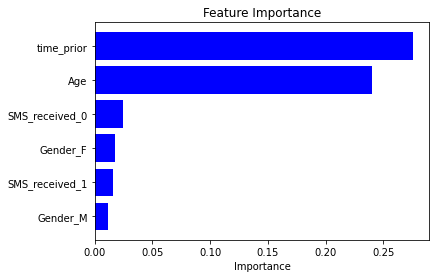

In [191]:
y_pos = np.arange(len(feature_ls))

plt.barh(y_pos, importance_value, color="blue")

plt.yticks(y_pos, feature_ls) #create name on y-axis
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() #top-down y axis

plt.show()

### Compare performance of 3 models

<Figure size 648x432 with 0 Axes>

<BarContainer object of 3 artists>

Text(0, 0.5, 'Recall')

([<matplotlib.axis.XTick at 0x1a5c9742888>,
 [Text(0, 0, 'Logistic model w/o oversampling'),
  Text(0, 0, 'Logistic model'),
  Text(0, 0, 'Random Forest model')])

Text(0.5, 1.0, 'Performance of 3 models')

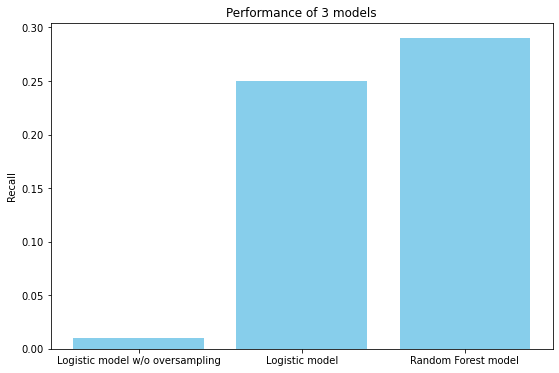

In [202]:
x_axis = np.arange(3)
recall=[0.01, 0.25 ,0.29]

plt.figure(figsize=(9,6))
plt.bar(x_axis, recall, color="skyblue")
plt.ylabel("Recall")
plt.xticks(x_axis, ('Logistic model w/o oversampling', 'Logistic model', 'Random Forest model'))
plt.title("Performance of 3 models")
plt.show()